1. Load the data and libraries
2. Data preparation and data preprocessing
3.Data Visualization
4.Data analysis
   1. Univariate analysis
   2.Bivariate (Correlation(chi square) and chi square(categorical))
   3.Multivariate
         1. Supervised
            1.Classification(Y is discrete)
            2. Regression(Y is continous)
          2.Unsupervised
             1.Clustering
             2. Dimensionality Reduction     

# Load the Data & Libraries


Load the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Load the data

In [ ]:
train=pd.read_csv('/content/train_ctrua4k__4_.csv')
test=pd.read_csv('/content/test_lauu6dg__4_.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [ ]:
train.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<ipython-input-140-a8f9ea5caa54>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'],kde=True)


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

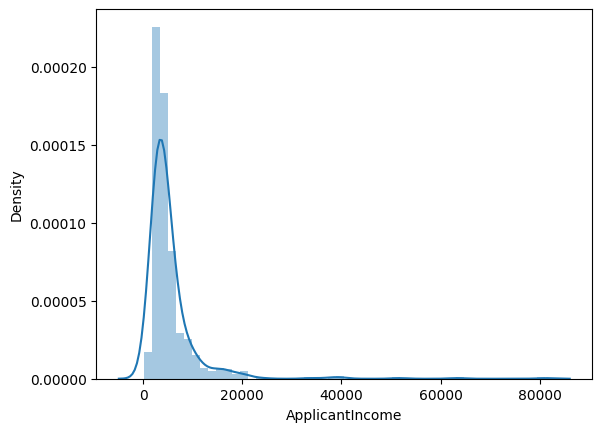

In [ ]:
sns.distplot(train['ApplicantIncome'],kde=True)

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

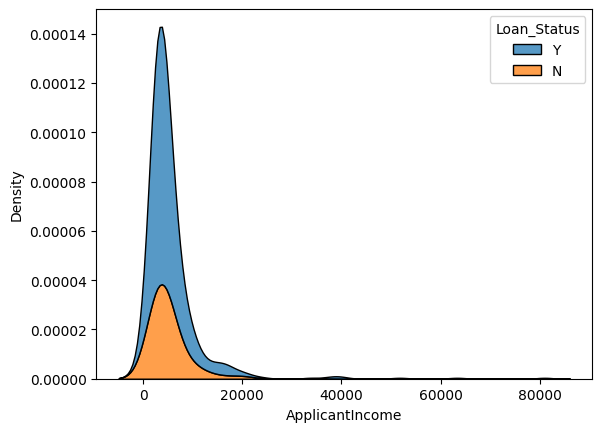

In [ ]:
sns.kdeplot(data=train, x="ApplicantIncome", hue="Loan_Status", multiple="stack")

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

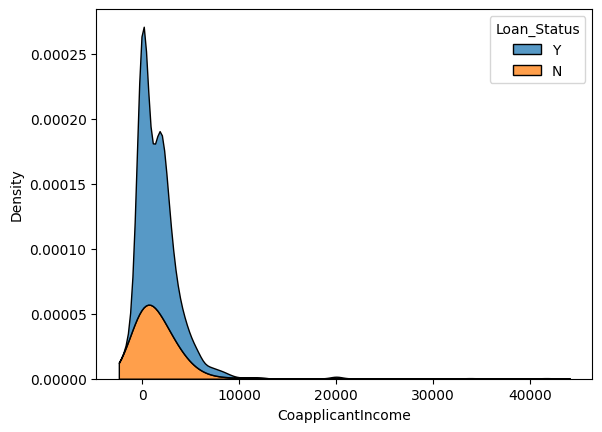

In [ ]:
sns.kdeplot(data=train, x="CoapplicantIncome", hue="Loan_Status", multiple="stack")

<Axes: xlabel='LoanAmount', ylabel='Density'>

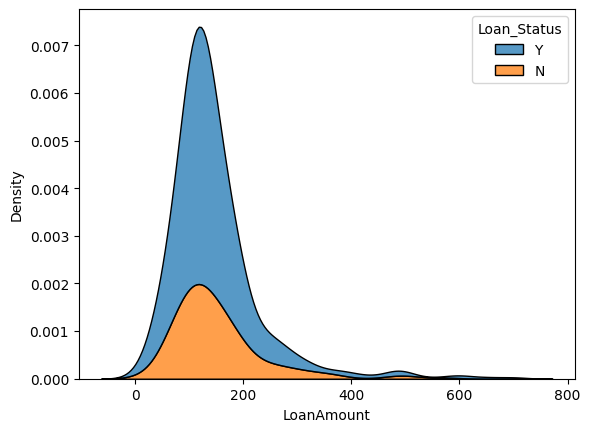

In [ ]:
sns.kdeplot(data=train, x="LoanAmount", hue="Loan_Status", multiple="stack")

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

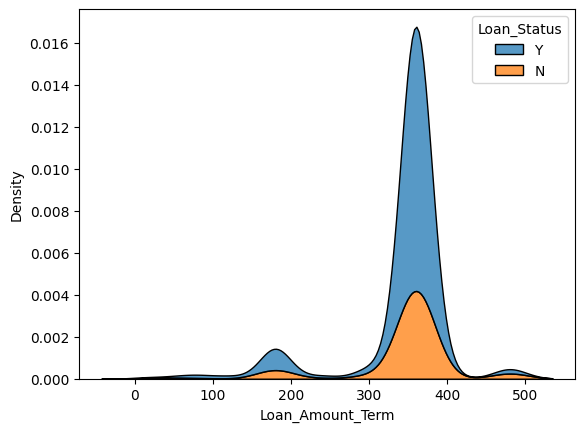

In [ ]:
sns.kdeplot(data=train, x="Loan_Amount_Term", hue="Loan_Status", multiple="stack")

<Axes: ylabel='Loan_Status'>

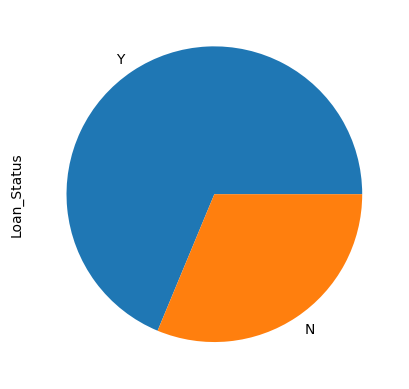

In [ ]:
train['Loan_Status'].value_counts().plot(kind='pie')

<ipython-input-146-8ae1bc75c7f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

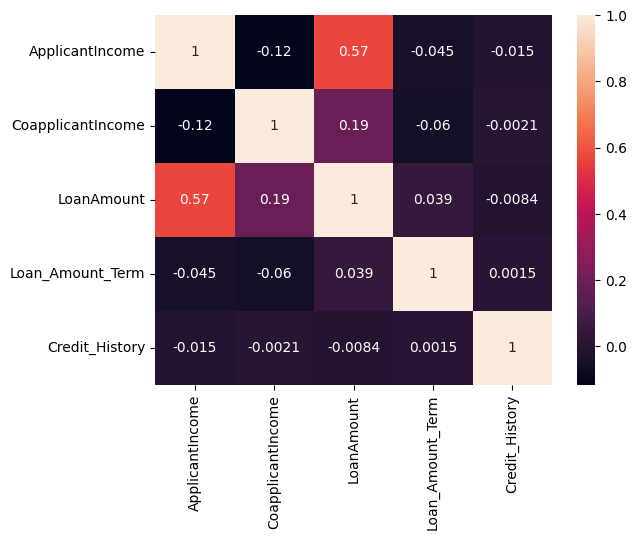

In [ ]:
sns.heatmap(train.corr(),annot=True)

In [ ]:
from scipy.stats import chi2_contingency
def chi_sq(var1, var2):
  """Check for Categorical Variable Relationship"""
  table = pd.crosstab(var1, var2)
  _,p,_,_ = chi2_contingency(table)
  if p <= 0.05:
    print('Accept the Alternate Hypothesis', round(p,2))
  else:
    print('Failed to reject the null Hypothesis', round(p,2))
  return table



*   Null Hypothesis: Gender and Loan Status are independent
*   Alternate Hypothesis:Gender and loan status are dependent


In [ ]:
pd.crosstab(train['Gender'],train['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
chi_sq(train['Gender'],train['Loan_Status'])

Failed to reject the null Hypothesis 0.71


Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
chi_sq(train['Married'],train['Loan_Status'])

Accept the Alternate Hypothesis 0.03


Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [ ]:
chi_sq(train['Education'],train['Loan_Status'])

Accept the Alternate Hypothesis 0.04


Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [ ]:
chi_sq(train['Self_Employed'],train['Loan_Status'])

Failed to reject the null Hypothesis 1.0


Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [ ]:
chi_sq(train['Property_Area'],train['Loan_Status'])

Accept the Alternate Hypothesis 0.0


Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [ ]:
chi_sq(train['Dependents'],train['Loan_Status'])

Failed to reject the null Hypothesis 0.37


Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [ ]:
chi_sq(train['Credit_History'],train['Loan_Status'])

Accept the Alternate Hypothesis 0.0


Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


# Data Prepation

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
def data_prep(data):
  #Imputation of missing values
  data['Gender'] = np.where(data['Gender'].isna(), data['Gender'].mode(dropna = True)[0], data['Gender'])
  data['Married'] = np.where(data['Married'].isna(), data['Married'].mode(dropna = True)[0], data['Married'])
  data['Dependents'] = np.where(data['Dependents'].isna(), data['Dependents'].mode(dropna = True), data['Dependents'])
  data['Dependents'].replace('3+', 3, inplace = True)
  data['Self_Employed'] = np.where(data['Self_Employed'].isna(), data['Self_Employed'].mode(dropna = True), data['Self_Employed'])
  data['LoanAmount'] = np.where(data['LoanAmount'].isna(), data['LoanAmount'].median(skipna = True), data['LoanAmount'])
  data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term'].isna(), data['Loan_Amount_Term'].median(skipna = True), data['Loan_Amount_Term'])
  data['Credit_History'] = np.where(data['Credit_History'].isna(), data['Credit_History'].mode(dropna = True), data['Credit_History'])
  data['Credit_History'] = data['Credit_History'].astype('int')
  data['Dependents'] = data['Dependents'].astype('int')
  return data


In [ ]:
data_prep(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

# Encode the discrete Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
      data[i]=le.fit_transform(data[i])
  return(data)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [ ]:
encode(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 62.5 KB


# Split the data

In [ ]:
x=train.drop(['Loan_ID','Loan_Status'],axis=1)
y=train['Loan_Status']

In [ ]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2


train test split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


# Apply Multi-variate Model

In [ ]:
logreg=LogisticRegression()
#fit the model
logreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
logreg.coef_

array([[ 6.26281359e-02,  4.17076622e-01, -9.45258072e-02,
        -4.15246638e-01, -1.46677090e-01, -1.41674766e-05,
        -3.84079290e-05, -5.50042888e-04, -5.04706935e-03,
         2.93027512e+00,  6.02247019e-02]])

In [ ]:
logreg.intercept_

array([0.15680039])

Probability of the model

In [ ]:
proba_train=logreg.predict_proba(x_train)
proba_train

array([[0.23013761, 0.76986239],
       [0.24879764, 0.75120236],
       [0.19489219, 0.80510781],
       [0.28187963, 0.71812037],
       [0.82532771, 0.17467229],
       [0.35873697, 0.64126303],
       [0.16331826, 0.83668174],
       [0.27134771, 0.72865229],
       [0.20375317, 0.79624683],
       [0.85047303, 0.14952697],
       [0.18355825, 0.81644175],
       [0.21176423, 0.78823577],
       [0.25521841, 0.74478159],
       [0.85161945, 0.14838055],
       [0.27220591, 0.72779409],
       [0.21971569, 0.78028431],
       [0.17865274, 0.82134726],
       [0.17355012, 0.82644988],
       [0.16915521, 0.83084479],
       [0.21458646, 0.78541354],
       [0.17796859, 0.82203141],
       [0.23620395, 0.76379605],
       [0.25256156, 0.74743844],
       [0.80091623, 0.19908377],
       [0.75270908, 0.24729092],
       [0.21975381, 0.78024619],
       [0.21480025, 0.78519975],
       [0.84758733, 0.15241267],
       [0.25985822, 0.74014178],
       [0.1674259 , 0.8325741 ],
       [0.

In [ ]:
y_hat_train = logreg.predict(x_train)
y_hat_test = logreg.predict(x_test)

In [ ]:
y_train

579    1
199    0
266    1
309    1
589    0
      ..
98     1
322    1
382    1
365    0
510    0
Name: Loan_Status, Length: 491, dtype: int64

In [ ]:
y_hat_train

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

# Model Evaluation

dealing with ytrain,ytest,y_hat_train,y_hat_test

In [ ]:
conf_matrix_train=confusion_matrix(y_train,y_hat_train)
print(conf_matrix_train)

[[ 65  85]
 [  5 336]]


In [ ]:
conf_matrix_test=confusion_matrix(y_test,y_hat_test)
print(conf_matrix_test)

[[17 25]
 [ 2 79]]


In [ ]:
print("Accuracy score for the train data is:",accuracy_score(y_train,y_hat_train))

Accuracy score for the train data is: 0.8167006109979633


In [ ]:
print("Accuracy score for the test data is:",accuracy_score(y_test,y_hat_test))

Accuracy score for the test data is: 0.7804878048780488


In [ ]:
print(classification_report(y_train,y_hat_train))

              precision    recall  f1-score   support

           0       0.93      0.43      0.59       150
           1       0.80      0.99      0.88       341

    accuracy                           0.82       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.82      0.79       491



In [ ]:
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123





```
# This is formatted as code
```

# Applying Decision tree

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
#fit the model
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)


In [ ]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train, y_hat_train_dtree)

The accuracy of the model is: 0.83
[[ 76  74]
 [  8 333]]
              precision    recall  f1-score   support

           0       0.90      0.51      0.65       150
           1       0.82      0.98      0.89       341

    accuracy                           0.83       491
   macro avg       0.86      0.74      0.77       491
weighted avg       0.84      0.83      0.82       491



In [ ]:
model_eval(y_test, y_hat_test_dtree)

The accuracy of the model is: 0.76
[[17 25]
 [ 5 76]]
              precision    recall  f1-score   support

           0       0.77      0.40      0.53        42
           1       0.75      0.94      0.84        81

    accuracy                           0.76       123
   macro avg       0.76      0.67      0.68       123
weighted avg       0.76      0.76      0.73       123



In [ ]:
x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="gini",max_depth=3)
#fit the model
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train, y_hat_train_dtree)

The accuracy of the model is: 0.82
[[ 67  83]
 [  3 338]]
              precision    recall  f1-score   support

           0       0.96      0.45      0.61       150
           1       0.80      0.99      0.89       341

    accuracy                           0.82       491
   macro avg       0.88      0.72      0.75       491
weighted avg       0.85      0.82      0.80       491



In [ ]:
model_eval(y_test, y_hat_test_dtree)

The accuracy of the model is: 0.76
[[16 26]
 [ 3 78]]
              precision    recall  f1-score   support

           0       0.84      0.38      0.52        42
           1       0.75      0.96      0.84        81

    accuracy                           0.76       123
   macro avg       0.80      0.67      0.68       123
weighted avg       0.78      0.76      0.73       123



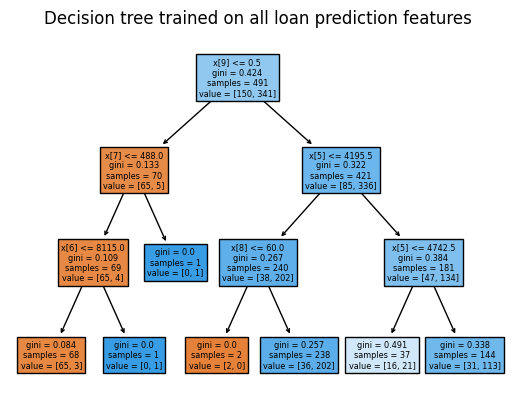

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure()
clf = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()

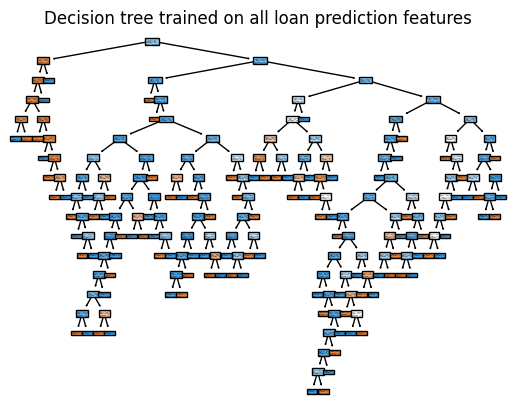

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
clf = DecisionTreeClassifier().fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()

In [ ]:

pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
Credit_History,0.848667
ApplicantIncome,0.065542
Loan_Amount_Term,0.038257
CoapplicantIncome,0.024112
LoanAmount,0.023423
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,0.000000


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="squared_error",max_depth=3)
#fit the model
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

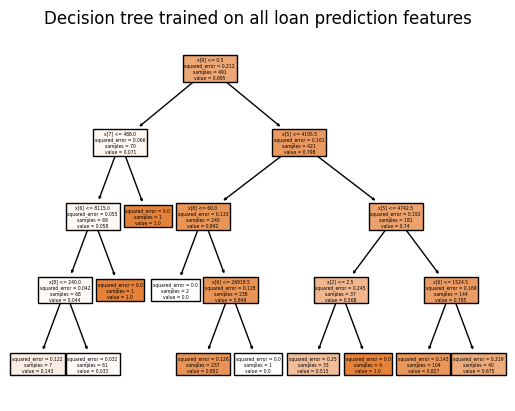

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure()
clf = DecisionTreeRegressor(max_depth = 4).fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()

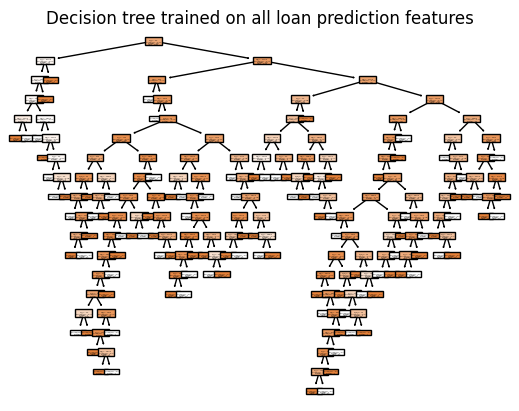

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
clf = DecisionTreeRegressor().fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()

In [ ]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
Credit_History,0.848667
ApplicantIncome,0.065542
Loan_Amount_Term,0.038257
LoanAmount,0.024112
CoapplicantIncome,0.023423
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,0.000000


Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=200,max_depth=5,verbose=1,oob_score=True)
#fit the model
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s


RandomForestClassifier(max_depth=5, n_estimators=200, oob_score=True, verbose=1)

In [ ]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [ ]:
model_eval(y_train,y_hat_train_rf)

The accuracy of the model is: 0.82
[[ 65  85]
 [  3 338]]
              precision    recall  f1-score   support

           0       0.96      0.43      0.60       150
           1       0.80      0.99      0.88       341

    accuracy                           0.82       491
   macro avg       0.88      0.71      0.74       491
weighted avg       0.85      0.82      0.80       491



In [ ]:
model_eval(y_test,y_hat_test_rf)

The accuracy of the model is: 0.78
[[17 25]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123



#Application on test data

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
 data_prep(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1,Rural


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int64  
 11  Property_Area      367 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 34.5+ KB


In [ ]:
encode(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777,113.0,360.0,1,2
363,363,1,1,0,0,0,4158,709,115.0,360.0,1,2
364,364,1,0,0,0,0,3250,1993,126.0,360.0,1,1
365,365,1,1,0,0,0,5000,2393,158.0,360.0,1,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int64  
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int64  
 11  Property_Area      367 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 34.5 KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 62.5 KB


In [ ]:
test.drop(['Loan_ID'],inplace=True,axis=1)

In [ ]:
test_preds=logreg.predict(test)

In [ ]:
test_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Submission

In [ ]:
submission=pd.read_csv('/content/sample_submission_49d68cx__2_.csv')

In [ ]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
submission['Loan_Status']=test_preds

In [ ]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [ ]:
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)




In [ ]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
submission.to_csv('Final_submission.csv',index=False)